In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("mail_data.csv")

In [4]:
df.sample(5)

,Category,Message
903,ham,I wonder if your phone battery went dead ? I h...
1466,spam,YOU 07801543489 are guaranteed the latests Nok...
2421,ham,Oic... Then better quickly go bathe n settle d...
4619,ham,Nvm... I'm going to wear my sport shoes anyway...
3858,ham,No! But we found a diff farm shop to buy some ...


In [5]:
df.shape

(5572, 2)

In [6]:
#1 data cleaning:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.rename(columns={'Category':'target', 'Message': 'text'}, inplace=True)


In [8]:
df.sample(5)

,target,text
4394,spam,RECPT 1/3. You have ordered a Ringtone. Your o...
1371,ham,Hope you are feeling great. Pls fill me in. Ab...
5553,ham,Hahaha..use your brain dear
1050,spam,18 days to Euro2004 kickoff! U will be kept in...
1864,ham,I'll let you know when it kicks in


In [9]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
#removing duplicted values
df=df.drop_duplicates(keep='first')

In [12]:
df.duplicated().sum()

0

In [13]:
df.shape

(5157, 2)

EDA

In [14]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

ham     4516
spam     641
Name: target, dtype: int64

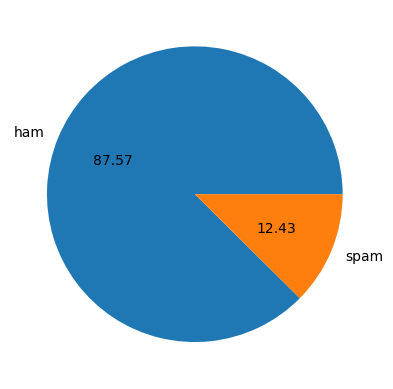

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

#unbalanced data

In [17]:
df.shape

(5157, 2)

In [18]:
a=df
a.head()


,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
a.target.value_counts()
# ham = majority class
#spam minority

ham     4516
spam     641
Name: target, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
#ham 0     spam 1

In [23]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [24]:
df.duplicated().sum()

0

In [25]:
!pip install imblearn

In [26]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()


In [27]:
X=df
Y=df['target']

In [28]:
df.target.value_counts()

0    4516
1     641
Name: target, dtype: int64

In [29]:
from imblearn import under_sampling,over_sampling


In [30]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_resampled, y_resampled=ros.fit_resample(X,Y)
print(sorted(Counter(y_resampled).items()), y_resampled.shape)

[(0, 4516), (1, 4516)] (9032,)


In [31]:
X.head()
X.target.value_counts()

0    4516
1     641
Name: target, dtype: int64

In [32]:
print(X_resampled)
print(y_resampled)

      target                                               text
0          0  Go until jurong point, crazy.. Available only ...
1          0                      Ok lar... Joking wif u oni...
2          1  Free entry in 2 a wkly comp to win FA Cup fina...
3          0  U dun say so early hor... U c already then say...
4          0  Nah I don't think he goes to usf, he lives aro...
...      ...                                                ...
9027       1  I want some cock! My hubby's away, I need a re...
9028       1  You have won a Nokia 7250i. This is what you g...
9029       1  Are you unique enough? Find out from 30th Augu...
9030       1  Congratulations ur awarded 500 of CD vouchers ...
9031       1  5p 4 alfie Moon's Children in need song on ur ...

[9032 rows x 2 columns]
0       0
1       0
2       1
3       0
4       0
       ..
9027    1
9028    1
9029    1
9030    1
9031    1
Name: target, Length: 9032, dtype: int32


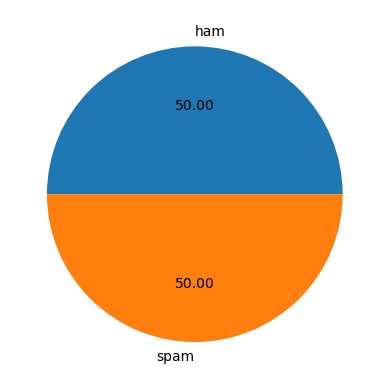

In [33]:
import matplotlib.pyplot as plt
plt.pie(y_resampled.value_counts(), labels =['ham','spam'], autopct='%0.2f')
plt.show()

#balanced data